## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Above is the info off all columns

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Check and drop columns with maximum missing values


In [4]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# dropping columns with high missing values
df.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley','Id'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Correlation between the Attributes


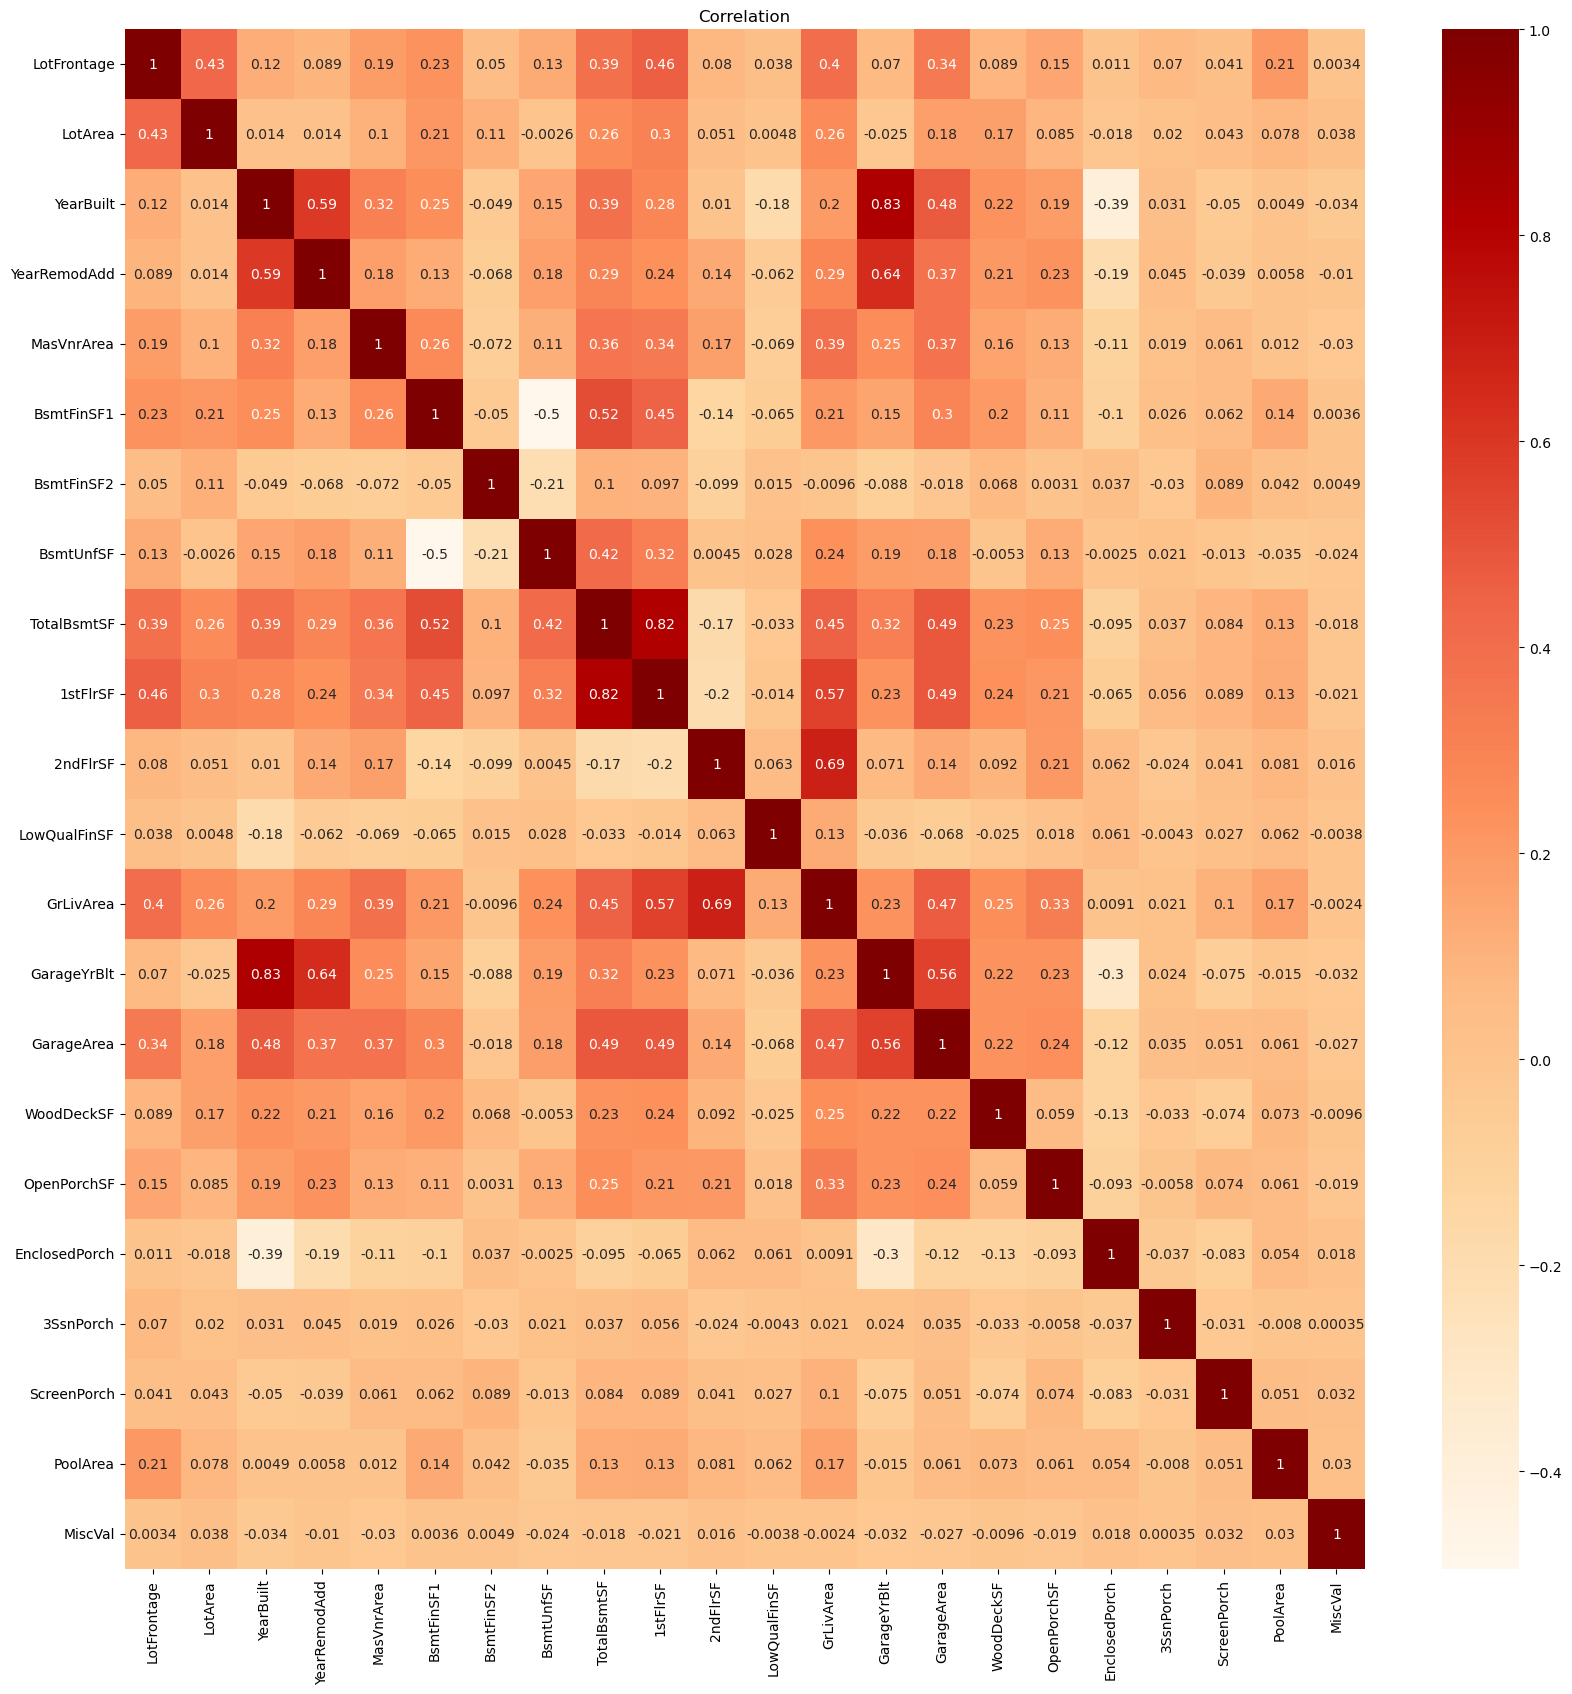

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

numeric_attributes=['LotFrontage','LotArea','YearBuilt',
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea',   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

plt.figure(figsize=(20,20))
sns.heatmap(df[numeric_attributes].corr(), cmap='OrRd',annot =True)
plt.title('Correlation');


From the heatmap above we can see that some of the columns can be removed directly as they are not adding any variance to our data and hence are not at all useful.


In [7]:
df.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

### Data Preparation
changing related number valules to string values

In [8]:
df['OverallQual']=df.OverallQual.map({1: 'Vry Poor', 2: 'Poor',3:'Fair', 4:'Bl Avg', 5:'Avg', 6:'Ab Avg', 7:'Gd', 8:'Vryery Gd', 9:'Exct', 10:'Vry Exct' })

In [9]:
df['OverallCond']=df.OverallCond.map({1: 'Vry Poor', 2: 'Poor',3:'Fair', 4:'Bl Avg', 5:'Avg', 6:'Ab Avg', 7:'Gd', 8:'Vryery Gd', 9:'Exct', 10:'Vry Exct' })

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Visualising Categorical variables
Visualising variable WRT Sales Price

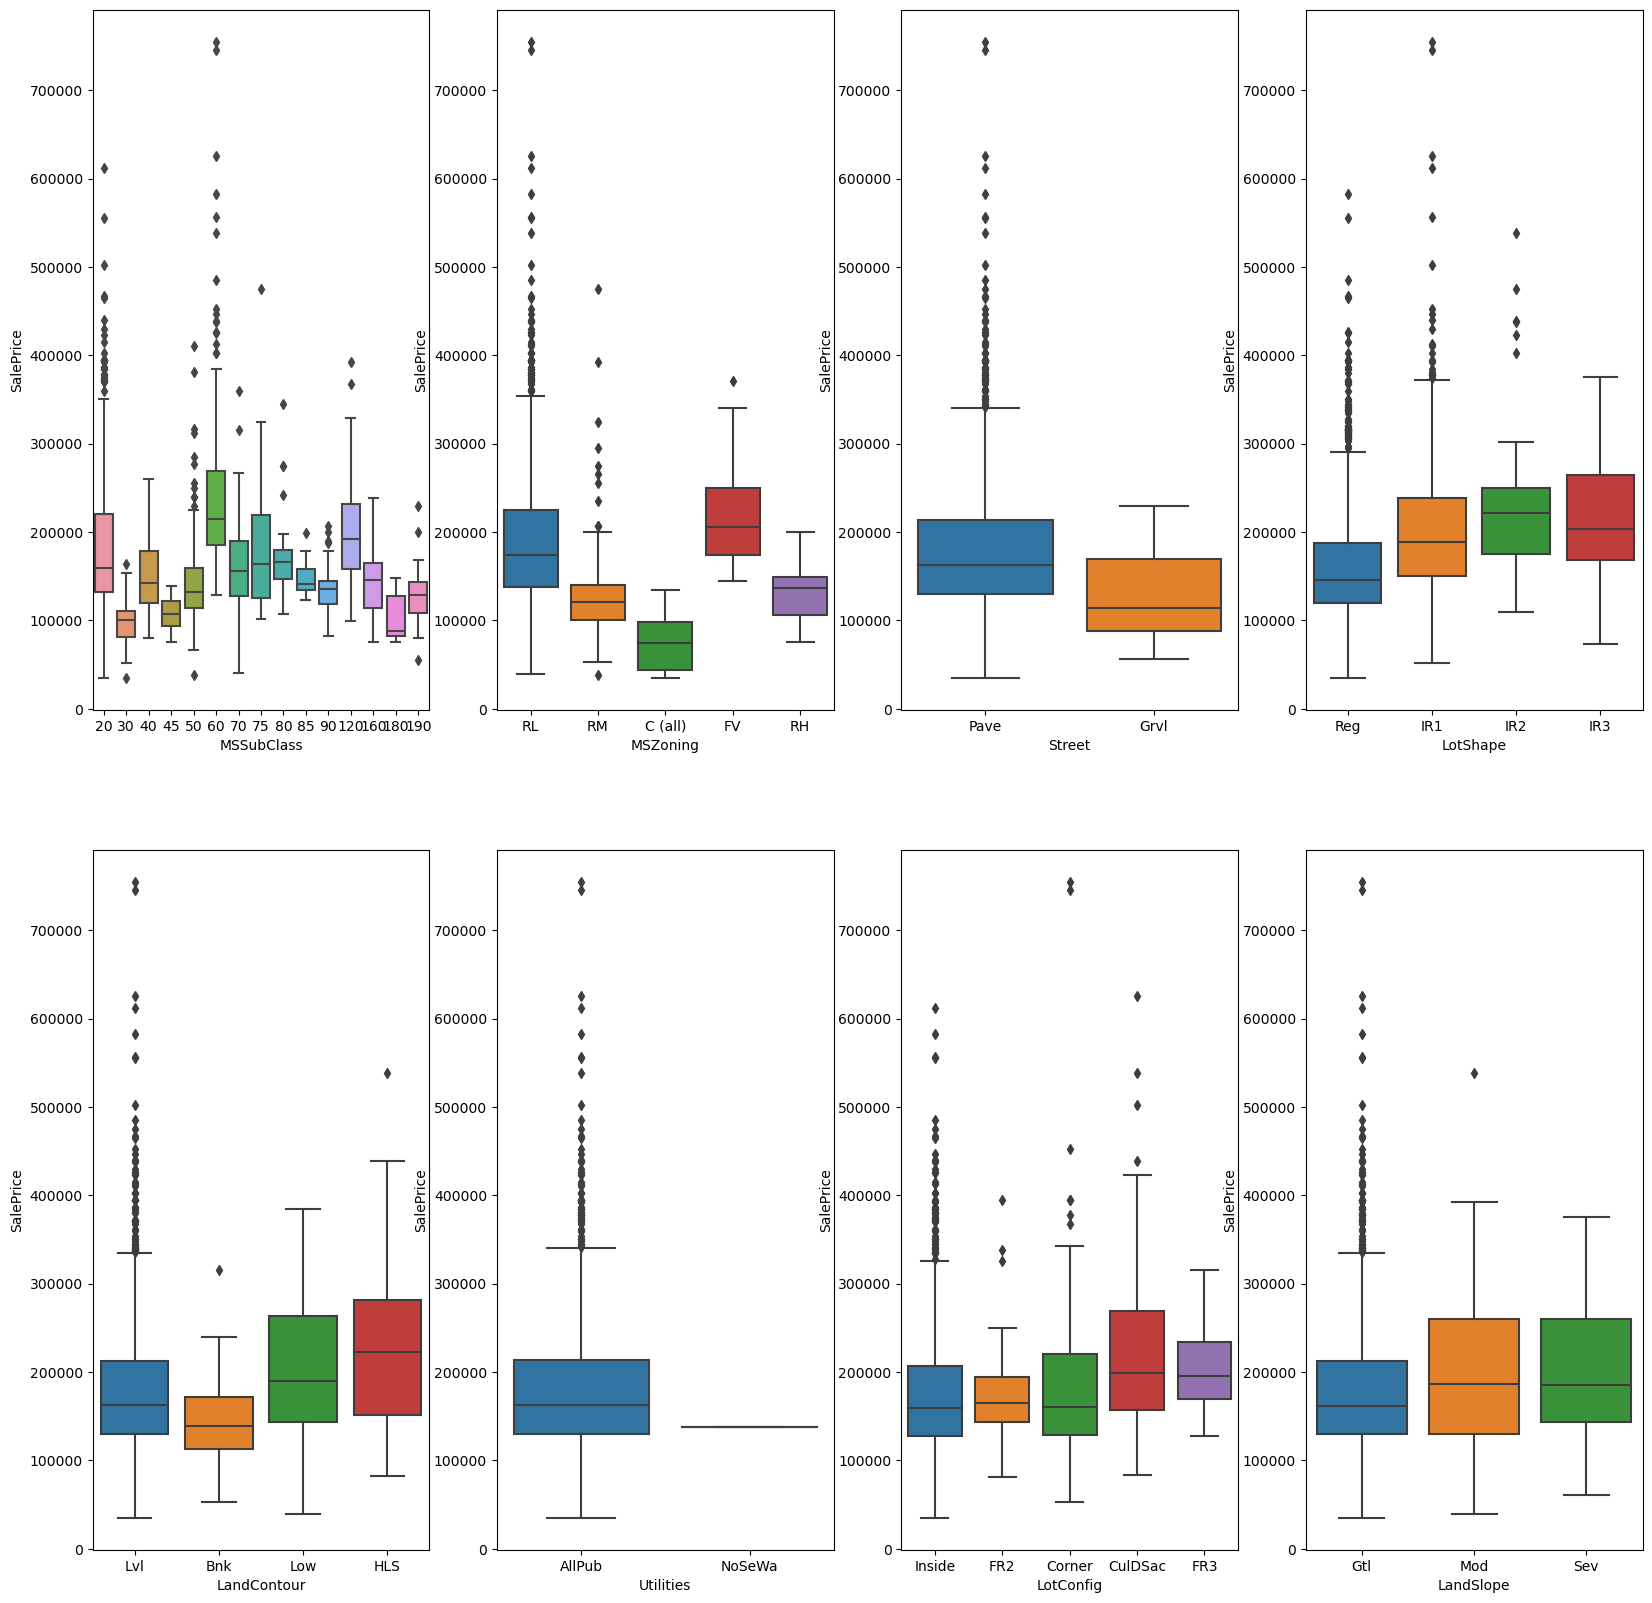

In [11]:
categorical_attributes=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope']

plt.figure(figsize=(20, 20))
i=int('1')
for cl in categorical_attributes:
    plt.subplot(2,4,i)
    sns.boxplot(x = cl, y = 'SalePrice', data = df)
    i+=1

plt.show()

* we have high sale price in residential low price and floating village residential in MSZonning.
* very less sale price with no utilities (high demand for All public utilities).

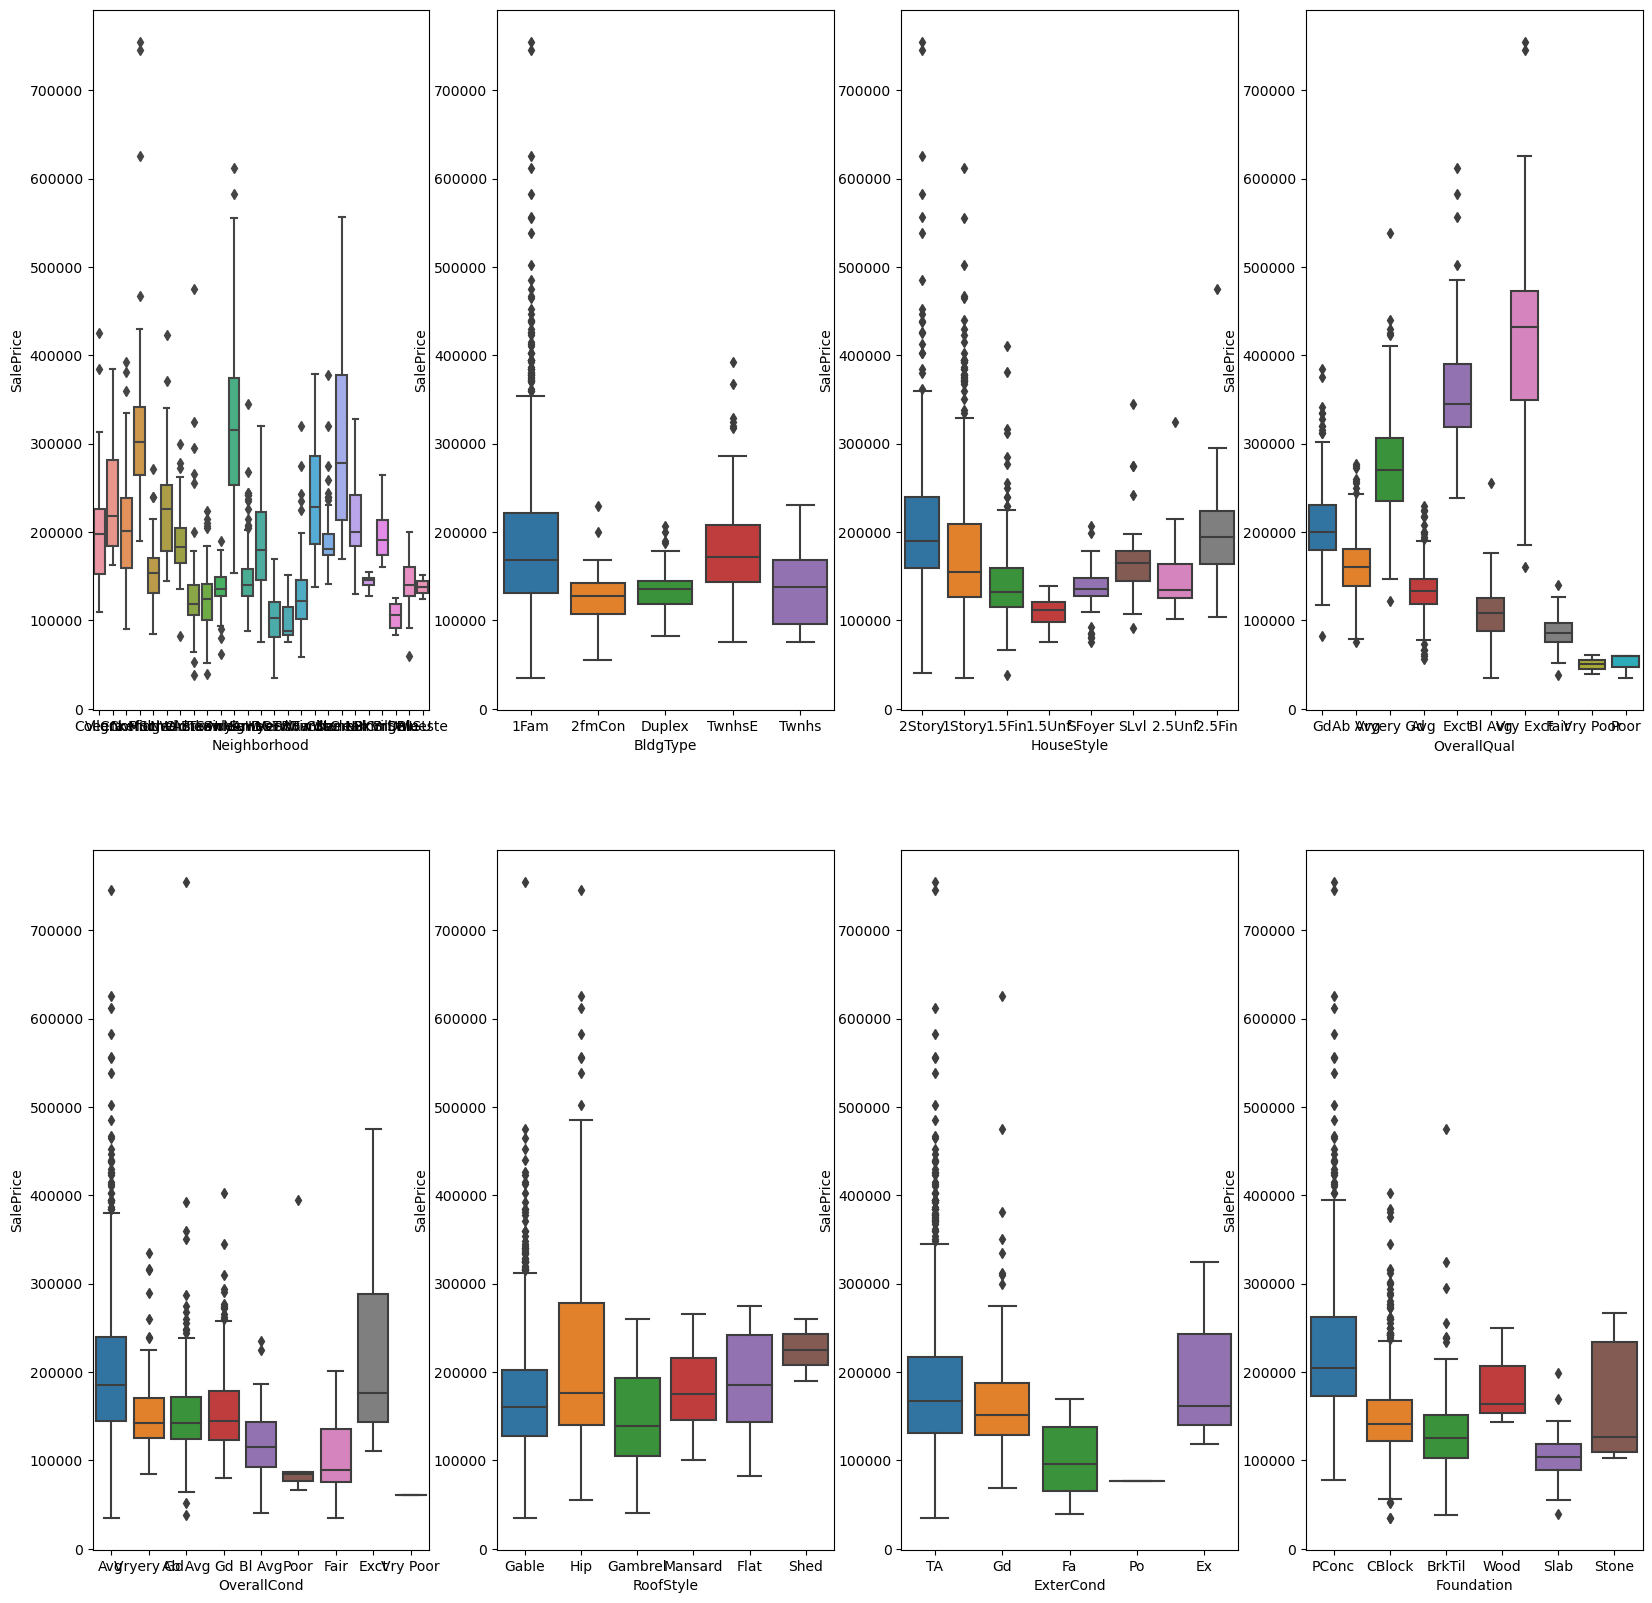

In [12]:
categorical_attributes2=['Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','ExterCond','Foundation']

plt.figure(figsize=(20,20))
i=int('1')
for cl in categorical_attributes2:
    plt.subplot(2,4,i)
    sns.boxplot(x = cl, y = 'SalePrice', data = df)
    i+=1

plt.show()

* high sale value for Excelent and very excelent overall quaility.

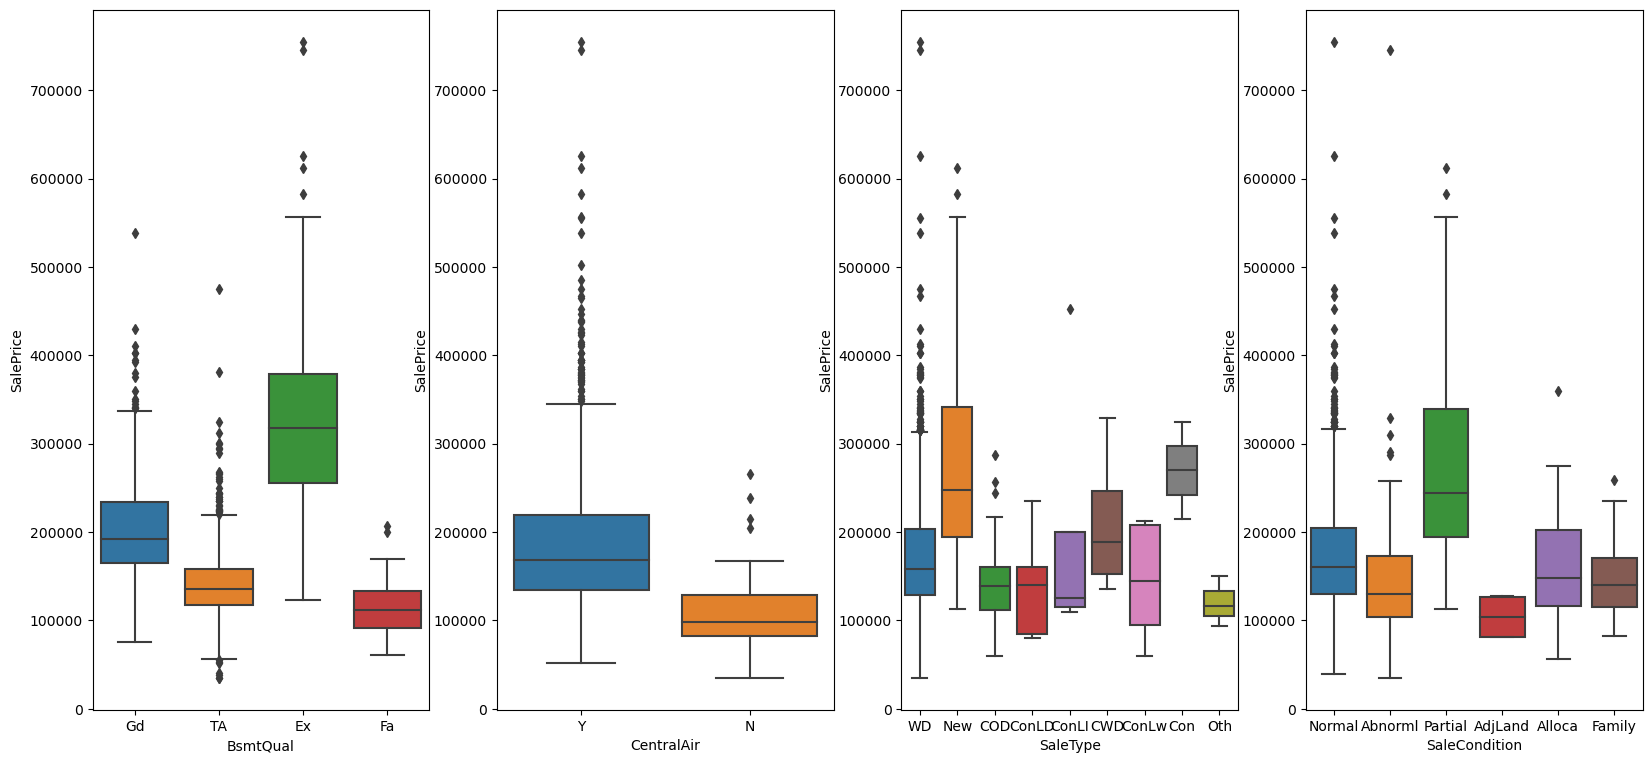

In [13]:
categorical_attributes3=['BsmtQual','CentralAir','SaleType','SaleCondition']

plt.figure(figsize=(20,20))
i=int('1')
for cl in categorical_attributes3:
    plt.subplot(2,4,i)
    sns.boxplot(x = cl, y = 'SalePrice', data = df)
    i+=1

plt.show()

* High sale value for Excellent basement quality.
* High sale value for Central AC.

### Filling NA values


In [14]:
df.FireplaceQu.fillna('NA',inplace=True)
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)
df.MasVnrType.fillna('None',inplace=True)
df.BsmtQual.fillna('NA',inplace=True)
df.BsmtFinType1.fillna('NA',inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)
df.GarageType.fillna('NA',inplace=True)
df.GarageFinish.fillna('NA',inplace=True)

### Create dummy variables

In [15]:
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass').astype(int)
MSSubClass_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning').astype(int)
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [17]:
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape').astype(int)
LotShape_df.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [18]:
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig').astype(int)
LotConfig_df.head()

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [19]:
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood').astype(int)
Neighborhood_df.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle').astype(int)
HouseStyle_df.head()

,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [21]:
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle').astype(int)
RoofStyle_df.head()

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [22]:
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st').astype(int)
Exterior1st_df.head()

,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd').astype(int)
Exterior2nd_df.head()

,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType').astype(int)
MasVnrType_df.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [25]:
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation').astype(int)
Foundation_df.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [26]:
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType').astype(int)
GarageType_df.head()

,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [27]:
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish').astype(int)
GarageFinish_df.head()

,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [28]:
Street_df = pd.get_dummies(df['Street'],drop_first=True, prefix='Street').astype(int)
Street_df.head()

,Street_Pave
0,1
1,1
2,1
3,1
4,1


In [29]:
LandContour_df = pd.get_dummies(df['LandContour'],drop_first=True, prefix='LandContour').astype(int)
LandContour_df.head()

,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
LandSlope_df = pd.get_dummies(df['LandSlope'],drop_first=True, prefix='LandSlope').astype(int)
LandSlope_df.head()

,LandSlope_Mod,LandSlope_Sev
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [31]:
Condition1_df = pd.get_dummies(df['Condition1'],drop_first=True, prefix='Condition1').astype(int)
Condition1_df.head()

,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [32]:
Condition2_df = pd.get_dummies(df['Condition2'],drop_first=True, prefix='Condition2').astype(int)
Condition2_df.head()

,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [33]:
BldgType_df = pd.get_dummies(df['BldgType'],drop_first=True, prefix='BldgType').astype(int)
BldgType_df.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [34]:
OverallQual_df = pd.get_dummies(df['OverallQual'],drop_first=True, prefix='OverallQual').astype(int)
OverallQual_df.head()

,OverallQual_Avg,OverallQual_Bl Avg,OverallQual_Exct,OverallQual_Fair,OverallQual_Gd,OverallQual_Poor,OverallQual_Vry Exct,OverallQual_Vry Poor,OverallQual_Vryery Gd
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [35]:
OverallCond_df = pd.get_dummies(df['OverallCond'],drop_first=True, prefix='OverallCond').astype(int)
OverallCond_df.head()

,OverallCond_Avg,OverallCond_Bl Avg,OverallCond_Exct,OverallCond_Fair,OverallCond_Gd,OverallCond_Poor,OverallCond_Vry Poor,OverallCond_Vryery Gd
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [36]:
RoofMatl_df = pd.get_dummies(df['RoofMatl'],drop_first=True, prefix='RoofMatl').astype(int)
RoofMatl_df.head()

,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [37]:
ExterQual_df = pd.get_dummies(df['ExterQual'],drop_first=True, prefix='ExterQual').astype(int)
ExterQual_df.head()

,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [38]:
ExterCond_df = pd.get_dummies(df['ExterCond'],drop_first=True, prefix='ExterCond').astype(int)
ExterCond_df.head()

,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [39]:
BsmtQual_df = pd.get_dummies(df['BsmtQual'],drop_first=True, prefix='BsmtQual').astype(int)
BsmtQual_df.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [40]:
BsmtFinType1_df = pd.get_dummies(df['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1').astype(int)
BsmtFinType1_df.head()

,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [41]:
Heating_df = pd.get_dummies(df['Heating'],drop_first=True, prefix='Heating').astype(int)
Heating_df.head()

,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [42]:
HeatingQC_df = pd.get_dummies(df['HeatingQC'],drop_first=True, prefix='HeatingQC').astype(int)
HeatingQC_df.head()

,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0


In [43]:
Electrical_df = pd.get_dummies(df['Electrical'],drop_first=True, prefix='Electrical').astype(int)
Electrical_df.head()

,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [44]:
FireplaceQu_df = pd.get_dummies(df['FireplaceQu'],drop_first=True, prefix='FireplaceQu').astype(int)
FireplaceQu_df.head()

,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


In [45]:
Functional_df = pd.get_dummies(df['Functional'],drop_first=True, prefix='Functional').astype(int)
Functional_df.head()

,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [46]:
KitchenQual_df = pd.get_dummies(df['KitchenQual'],drop_first=True, prefix='KitchenQual').astype(int)
KitchenQual_df.head()

,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [47]:
SaleCondition_df = pd.get_dummies(df['SaleCondition'],drop_first=True, prefix='SaleCondition').astype(int)
SaleCondition_df.head()

,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


In [48]:
SaleType_df = pd.get_dummies(df['SaleType'],drop_first=True, prefix='SaleType').astype(int)
SaleType_df.head()

,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [49]:
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish').astype(int)
GarageFinish_df.head()

,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [50]:
df = pd.concat([df,MSSubClass_df,MSZoning_df,LotShape_df,LotConfig_df,Neighborhood_df,HouseStyle_df,RoofStyle_df,Exterior1st_df,Exterior2nd_df,MasVnrType_df,Foundation_df,GarageType_df,GarageFinish_df,Street_df,LandContour_df,LandSlope_df,Condition1_df,Condition2_df,BldgType_df,OverallQual_df,OverallCond_df,RoofMatl_df,ExterQual_df,ExterCond_df,BsmtQual_df,BsmtFinType1_df,Heating_df,HeatingQC_df,Electrical_df,SaleCondition_df,SaleType_df,FireplaceQu_df,Functional_df,KitchenQual_df],axis=1)

Dropping columns for which we have created dummy variables

In [51]:
df.drop(columns=['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','GarageFinish','Street','LandContour','LandSlope','Condition1','Condition2','BldgType','OverallQual','OverallCond','RoofMatl','ExterQual','ExterCond','BsmtQual','BsmtFinType1','Heating','HeatingQC','Electrical','PavedDrive','CentralAir','Utilities','SaleType','KitchenQual','Functional','FireplaceQu','SaleCondition'], inplace=True)

In [52]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65.0,8450,2003,2003,706,0,150,856,856,854,...,0,0,0,0,0,0,1,0,1,0
1,80.0,9600,1976,1976,978,0,284,1262,1262,0,...,1,0,0,0,0,0,1,0,0,1
2,68.0,11250,2001,2002,486,0,434,920,920,866,...,1,0,0,0,0,0,1,0,1,0
3,60.0,9550,1915,1970,216,0,540,756,961,756,...,0,0,0,0,0,0,1,0,1,0
4,84.0,14260,2000,2000,655,0,490,1145,1145,1053,...,1,0,0,0,0,0,1,0,1,0


In [53]:
df.info

<bound method DataFrame.info of       LotFrontage  LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  \
0            65.0     8450       2003          2003         706           0   
1            80.0     9600       1976          1976         978           0   
2            68.0    11250       2001          2002         486           0   
3            60.0     9550       1915          1970         216           0   
4            84.0    14260       2000          2000         655           0   
...           ...      ...        ...           ...         ...         ...   
1455         62.0     7917       1999          2000           0           0   
1456         85.0    13175       1978          1988         790         163   
1457         66.0     9042       1941          2006         275           0   
1458         68.0     9717       1950          1996          49        1029   
1459         75.0     9937       1965          1965         830         290   

      BsmtUnfSF  To

### Prepairing Data For Modeling

In [54]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,train_size=0.70,random_state=100)
print(train.shape)
print(test.shape)

(1021, 245)
(439, 245)


In [55]:
train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,1971.321254,1984.984329,448.165524,50.087169,563.745348,1061.998041,1168.611166,343.540646,...,0.203722,0.002938,0.018609,0.025465,0.007835,0.000979,0.935357,0.026445,0.406464,0.501469
std,22.090553,10308.062725,30.321038,20.604962,465.115135,170.847470,448.739203,459.098042,397.896911,435.498994,...,0.402962,0.054153,0.135207,0.157611,0.088214,0.031296,0.246014,0.160532,0.491414,0.500243
min,21.000000,1477.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,1954.000000,1967.000000,0.000000,0.000000,216.000000,793.000000,876.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,1973.000000,1994.000000,392.000000,0.000000,462.000000,994.000000,1086.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,78.000000,11512.000000,2000.000000,2004.000000,712.000000,0.000000,806.000000,1314.000000,1422.000000,728.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescalling number valules

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars=['LotFrontage','LotArea','BsmtFinSF1','YearBuilt','YearRemodAdd','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1021.0,0.166332,0.075653,0.0,0.133562,0.164384,0.195205,1.0
LotArea,1021.0,0.042162,0.048221,0.0,0.027937,0.037555,0.046943,1.0
YearBuilt,1021.0,0.719719,0.219718,0.0,0.594203,0.731884,0.927536,1.0
YearRemodAdd,1021.0,0.583072,0.343416,0.0,0.283333,0.733333,0.900000,1.0
BsmtFinSF1,1021.0,0.079406,0.082409,0.0,0.000000,0.069454,0.126152,1.0
...,...,...,...,...,...,...,...,...
Functional_Sev,1021.0,0.000979,0.031296,0.0,0.000000,0.000000,0.000000,1.0
Functional_Typ,1021.0,0.935357,0.246014,0.0,1.000000,1.000000,1.000000,1.0
KitchenQual_Fa,1021.0,0.026445,0.160532,0.0,0.000000,0.000000,0.000000,1.0
KitchenQual_Gd,1021.0,0.406464,0.491414,0.0,0.000000,0.000000,1.000000,1.0


training model

In [57]:
y_train = train.pop('SalePrice')
X_train = train

### RFE (Recursive Feature Elimination)
Selecting only those columns which are more interrelated.

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=27)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 89),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 23),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', False, 16),
 ('BsmtFullBath', False, 105),
 ('BsmtHalfBath', False, 176),
 ('FullBath', False, 131),
 ('HalfBath', False, 71),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 98),
 ('Fireplaces', False, 120),
 ('GarageCars', False, 87),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 126),
 ('OpenPorchSF', False, 84),
 ('EnclosedPorch', False, 125),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 97),
 ('PoolArea', False, 48),
 ('MiscVal', False, 4),
 ('MoSold', False, 150),
 ('YrSold', False, 183),
 ('MSSubClass_30', False, 96),
 ('MSSubClass_40', False, 107),
 ('MSSubClass_45', False, 106),
 ('MSSubClass_50', False, 179),
 ('MSSubClass_60', False,

Selected feature are as follows

In [59]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'RoofStyle_Shed', 'Foundation_Wood', 'Condition2_PosN',
       'Condition2_RRAe', 'OverallQual_Exct', 'OverallQual_Vry Exct',
       'OverallQual_Vryery Gd', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW', 'SaleType_Con',
       'Functional_Sev'],
      dtype='object')

create x train for RFE selected model and calculate stats for the same.

In [60]:
import statsmodels.api as sm

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:32   Log-Likelihood:                -11781.
No. Observations:                1021   AIC:                         2.362e+04
Df Residuals:                     993   BIC:                         2.376e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.992e+05   3.04e+04    -26.305      0.000   -8.59e+05    -7.4e+05
LotFrontage            5.311e+04   1.28e+04      4.134      0.000    2.79e+04    7.83e+04
LotArea                9.418e+04   1.84e+04      5.128      0.000    5.81e+04     1.3e+05
YearBuilt              6.849e+04   4398.632     15.570      0.000    5.99e+04    7.71e+04
BsmtFinSF1              1.07e+05   1.19e+04      8.957      0.000    8.36e+04     1.3e+05
TotalBsmtSF            1.332e+05   2.13e+04      6.246      0.000    9.14e+04    1.75e+05
1stFlrSF               3.325e+05   1.77e+04     18.738      0.000    2.98e+05    3.67e+05
2ndFlrSF                1.63e+05   5263.004     30.974      0.000    1.53e+05    1.73e+05
BedroomAbvGr          -5.858e+04   1.02e+04     -5.752      0.000   -7.86e+04   -3.86e+04
KitchenAbvGr           -6.96e+04   7584.205     -9.178      0.000   -8.45e+04   -5.47e+04
GarageArea             3.722e+04   7141.667      5.212      0.000    2.32e+04    5.12e+04
RoofStyle_Shed         6.561e+04   2.95e+04      2.224      0.026    7718.670    1.23e+05
Foundation_Wood       -3.891e+04    1.8e+04     -2.168      0.030   -7.41e+04   -3688.687
Condition2_PosN       -5.153e+05   2.67e+04    -19.277      0.000   -5.68e+05   -4.63e+05
Condition2_RRAe       -1.116e+05   3.89e+04     -2.871      0.004   -1.88e+05   -3.53e+04
OverallQual_Exct        9.17e+04   5380.783     17.042      0.000    8.11e+04    1.02e+05
OverallQual_Vry Exct   1.482e+05   8149.493     18.182      0.000    1.32e+05    1.64e+05
OverallQual_Vryery Gd  3.725e+04   2924.451     12.738      0.000    3.15e+04     4.3e+04
RoofMatl_CompShg       8.004e+05   2.96e+04     27.072      0.000    7.42e+05    8.58e+05
RoofMatl_Membran       8.664e+05   3.88e+04     22.354      0.000     7.9e+05    9.42e+05
RoofMatl_Metal         8.211e+05   3.86e+04     21.246      0.000    7.45e+05    8.97e+05
RoofMatl_Roll          7.888e+05   3.87e+04     20.364      0.000    7.13e+05    8.65e+05
RoofMatl_Tar&Grv       7.945e+05   3.15e+04     25.210      0.000    7.33e+05    8.56e+05
RoofMatl_WdShake       7.647e+05    3.3e+04     23.144      0.000       7e+05     8.3e+05
RoofMatl_WdShngl       8.486e+05   3.14e+04     27.013      0.000    7.87e+05     9.1e+05
Heating_OthW          -5.343e+04   2.57e+04     -2.081      0.038   -1.04e+05   -3047.247
SaleType_Con           3.644e+04   1.79e+04      2.036      0.042    1312.613    7.16e+04
Functional_Sev        -1.045e+05   2.77e+04     -3.779      0.000   -1.59e+05   -5.02e+04
==============================================================================
Omnibus:                      184.634   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1083.452
Skew:                           0.687   Prob(JB):       

### Calculating VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1486.88
18,RoofMatl_CompShg,24.39
22,RoofMatl_Tar&Grv,9.35
23,RoofMatl_WdShake,6.86
24,RoofMatl_WdShngl,6.20
6,1stFlrSF,4.30
5,TotalBsmtSF,4.13
11,RoofStyle_Shed,2.74
14,Condition2_RRAe,2.38
19,RoofMatl_Membran,2.37


### Error plot

Text(0.5, 0, 'Errors')

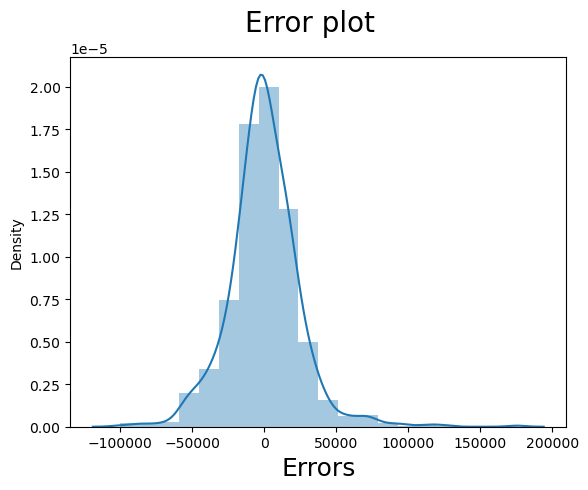

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

y_train_pr = lm.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_pr), bins = 20)
fig.suptitle('Error plot', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)       

as we can see error distribution is around 0, therefore we can move forward to make prediction

### Prediction on train dataset

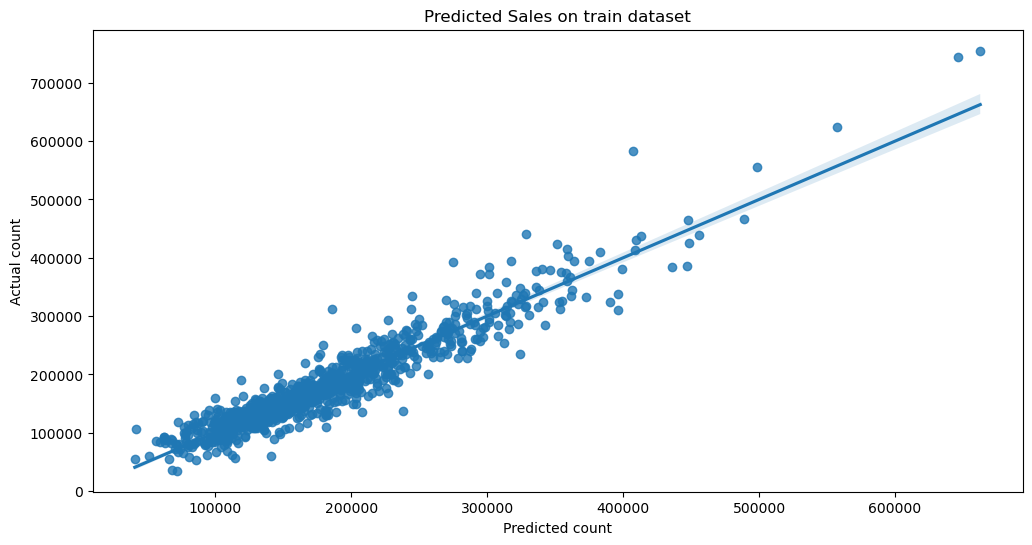

In [63]:
plt.figure(figsize = (12,6))
sns.regplot(y=y_train, x=y_train_pr)
plt.title('Predicted Sales on train dataset')
plt.xlabel('Predicted count')
plt.ylabel('Actual count')
plt.show()

### Model test
Creating model and predict on test dataset

In [64]:
#scaling test set
test[num_vars]=scaler.transform(test[num_vars])
y_test = test.pop('SalePrice')
X_test = test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FireplaceQu_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
1436,1.0,0.133562,0.035192,0.717391,0.350000,0.109142,0.0,0.106164,0.141408,0.113889,...,0,0,0,0,0,0,1,0,0,1
57,1.0,0.232877,0.047566,0.956522,0.900000,0.000000,0.0,0.368151,0.140753,0.112963,...,0,0,0,0,0,0,1,0,1,0
780,1.0,0.143836,0.029930,0.891304,0.766667,0.000000,0.0,0.529538,0.202455,0.203935,...,1,0,0,0,0,0,1,0,0,1
382,1.0,0.198630,0.036338,0.971014,0.933333,0.000000,0.0,0.401969,0.153682,0.131250,...,0,0,0,0,0,0,1,0,1,0
1170,1.0,0.188356,0.039309,0.760870,0.450000,0.092488,0.0,0.245719,0.179378,0.172685,...,0,0,0,0,0,0,1,0,0,1


In [65]:
X_test_rfe = X_test_sm[X_train_rfe.columns]
X_test_rfe.head()

,const,LotFrontage,LotArea,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Heating_OthW,SaleType_Con,Functional_Sev
1436,1.0,0.133562,0.035192,0.717391,0.109142,0.141408,0.113889,0.000000,0.375,0.0,...,1,0,0,0,0,0,0,0,0,0
57,1.0,0.232877,0.047566,0.956522,0.000000,0.140753,0.112963,0.416465,0.375,0.0,...,1,0,0,0,0,0,0,0,0,0
780,1.0,0.143836,0.029930,0.891304,0.000000,0.202455,0.203935,0.000000,0.375,0.0,...,1,0,0,0,0,0,0,0,0,0
382,1.0,0.198630,0.036338,0.971014,0.000000,0.153682,0.131250,0.415496,0.375,0.0,...,1,0,0,0,0,0,0,0,0,0
1170,1.0,0.188356,0.039309,0.760870,0.092488,0.179378,0.172685,0.000000,0.375,0.0,...,1,0,0,0,0,0,0,0,0,0


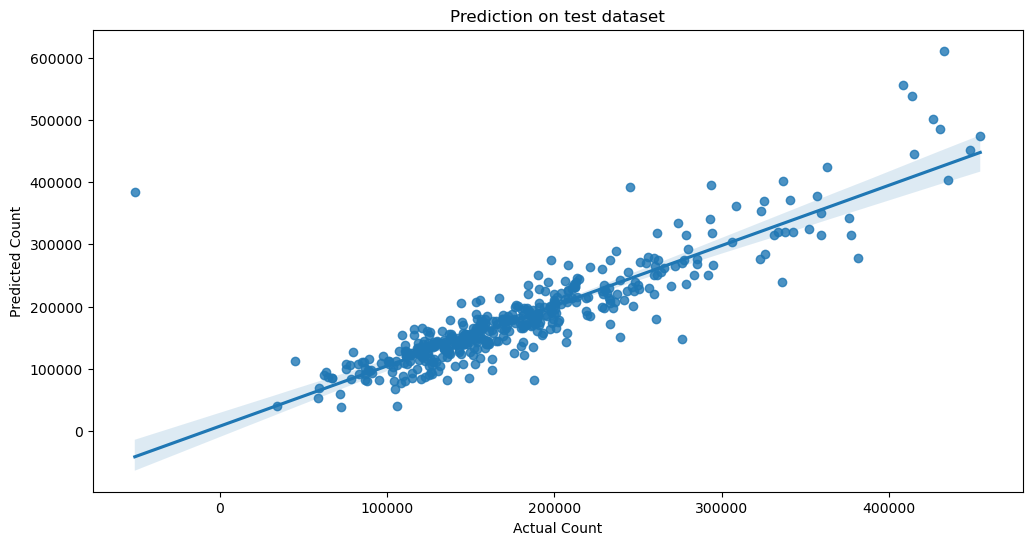

In [66]:
y_test_pr = lm.predict(X_test_rfe)
plt.figure(figsize = (12,6))
sns.regplot(y=y_test, x=y_test_pr)
plt.title('Prediction on test dataset')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

##### Above scatter plot shows the linear relationship between actual count and predicted count, therefore we can say our model is much stable

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pr)

0.7825855599809072

our model accuracy is apprx 78.26%

### Residual analysis

Text(0, 0.5, 'Prediction')

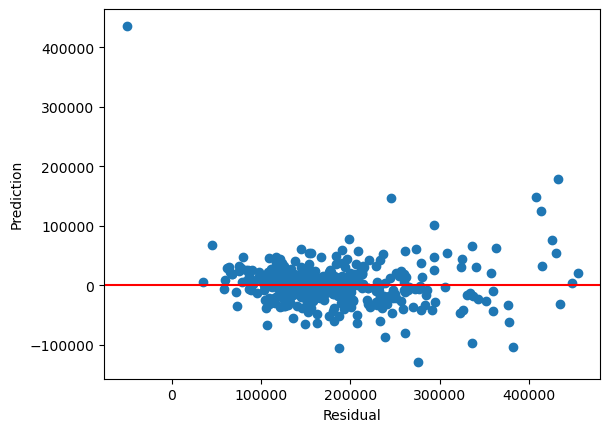

In [68]:
y_res=y_test - y_test_pr
plt.scatter(y_test_pr,y_res)
plt.axhline(y=0,color='r')
plt.xlabel('Residual')
plt.ylabel('Prediction')

As above plot show no pattern in the scatter plot and equally distributed to y, our model is stable.

In [69]:
from sklearn.metrics import mean_squared_error

y_pred_train = lm.predict(X_train_rfe)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_test_pr

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.901374238586689
0.7825855599809072
629415456860.9329
614353449002.538
616469595.3584063
1399438380.415804


### Ridge Regression

In [70]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [71]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
print(model_cv.best_params_)

{'alpha': 0.05}


In [73]:
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([      0.        ,   29686.47275793,   98209.95171974,
         71453.10673509,   85753.80955703,  105250.12902317,
        324483.8246021 ,  154472.66971685,  -47152.97146735,
        -69785.59800525,   41381.89588162,   68263.78261545,
        -33338.22194019, -457727.79026219, -104896.21313012,
         96888.30736164,  141208.92359951,   40650.39818314,
        538011.15096578,  576776.72324422,  534354.48218382,
        503798.34493633,  527291.75626391,  498901.89401528,
        587672.67491899,  -52370.23631317,   36049.73532133,
        -93246.83137206])

In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8929951605556996
0.7925012222315498
682889530484.0215
586334512899.2522
668843810.4642718
1335613924.5996633


### Lasso

In [75]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(model_cv.best_params_)

{'alpha': 20}


In [77]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([      0.        ,   32421.17243371,   91824.753609  ,
         71245.20850558,   90110.79249906,  109207.2926252 ,
        325804.77747678,  154600.35843221,  -47545.73672708,
        -69136.05949319,   41290.47007401,   23220.80556249,
        -24421.82753863, -464525.95849644,  -45129.99225794,
         95349.94090622,  142418.44775135,   39738.59386953,
        593572.78124649,  641324.65973063,  596126.08436284,
        563796.33275217,  581006.53746066,  566650.56402822,
        644989.18872815,  -33455.46495987,   26810.43429036,
        -75400.34138826])

In [78]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8955689449639581
0.7911719430980648
666464007720.2806
590090690365.0725
652756129.0110487
1344170137.5058599


In [79]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.013742e-01,8.929952e-01,8.955689e-01
1,R2 Score (Test),7.825856e-01,7.925012e-01,7.911719e-01
2,RSS (Train),6.294155e+11,6.828895e+11,6.664640e+11
3,RSS (Test),6.143534e+11,5.863345e+11,5.900907e+11
4,MSE (Train),2.482881e+04,2.586201e+04,2.554909e+04
5,MSE (Test),3.740907e+04,3.654605e+04,3.666293e+04


Above is the matrix comparing all 3 regressions, therefore going with Linear Regression seems to be a good option.